# Chocolate Data Exploration
## by Abbie Weisenbloom

## Preliminary Wrangling

This document explores a dataset containing information from 2006 to 2020 in 66 countries about chocolate reviews and tastes. Hold chocolate company name, and country of origin of the chocolate bean.

### Import and Clean

In [437]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [438]:
# load in the dataset into a pandas dataframe, print statistics

In [439]:
#clean data - minimal cleaning, just remove extra index
#correct spelling of Bolivia
choc = pd.read_csv('chocolate.csv')
del choc['Unnamed: 0']


In [440]:
choc.company.value_counts();

In [441]:
#Replace comma for easier processing down the line. Correct spelling of Bolivia
choc['company'] = choc['company'].str.replace('Smooth Chocolator, The', 'Smooth Chocolator (The)')
choc['country_of_bean_origin'] = choc['country_of_bean_origin'].str.replace('Bolvia','Bolivia')
choc.head();
#Check replacements
choc[choc['company'] == 'Smooth Chocolator, The'];
choc[choc['country_of_bean_origin'] == 'Bolvia'];
#Save to csv
#choc_orig.to_csv('chocolate_clean.csv', index=False)'''

In [442]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2500
pd.set_option('display.max_colwidth', None)

In [443]:
#choc = pd.read_csv('chocolate_clean.csv')
#choc.head()

In [444]:
# high-level overview of data shape and composition
print(choc.shape)
print(choc.info())

(2224, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   ref                               2224 non-null   int64   
 1   company                           2224 non-null   object  
 2   company_location                  2224 non-null   object  
 3   review_date                       2224 non-null   int64   
 4   country_of_bean_origin            2224 non-null   object  
 5   specific_bean_origin_or_bar_name  2224 non-null   object  
 6   cocoa_percent                     2224 non-null   float64 
 7   rating                            2224 non-null   float64 
 8   counts_of_ingredients             2224 non-null   int64   
 9   beans                             2224 non-null   object  
 10  cocoa_butter                      2224 non-null   category
 11  vanilla                           2224 non-nu

In [445]:
choc.vanilla.value_counts()

have_not_vanila    1876
have_vanila         348
Name: vanilla, dtype: int64

In [446]:
choc.head(5)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN,Highly Recommended
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN,Recommended
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN,Highly Recommended
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN,Highly Recommended


In [447]:
# convert all ingredients to 0 - 1 categorical types
ordinal_var_dict = {'cocoa_butter': ['have_cocoa_butter','have_not_cocoa_butter'],
                    'vanilla': ['have_vanila','have_not_vanila'],
                    'lecithin': ['have_lecithin', 'have_not_lecithin'],
                    'salt': ['have_salt', 'have_not_salt'],
                    'sugar': ['have_sugar', 'have_not_sugar'],
                    'sweetener_without_sugar': ['have_sweetener_without_sugar','have_not_sweetener_without_sugar']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    choc[var] = choc[var].astype(ordered_var)

In [448]:
# descriptive statistics for numeric variables
print(choc.describe())

               ref  review_date  cocoa_percent       rating  \
count  2224.000000  2224.000000    2224.000000  2224.000000   
mean   1337.010342  2013.857914      71.493930     3.198561   
std     693.959768     3.582151       5.278253     0.434329   
min       5.000000  2006.000000      42.000000     1.000000   
25%     776.000000  2011.000000      70.000000     3.000000   
50%    1381.000000  2014.000000      70.000000     3.250000   
75%    1928.000000  2016.000000      74.000000     3.500000   
max    2490.000000  2020.000000     100.000000     4.000000   

       counts_of_ingredients  
count            2224.000000  
mean                3.075989  
std                 0.929875  
min                 1.000000  
25%                 2.000000  
50%                 3.000000  
75%                 4.000000  
max                 6.000000  


In [449]:
choc.sweetener_without_sugar.value_counts()

have_not_sweetener_without_sugar    2148
have_sweetener_without_sugar          76
Name: sweetener_without_sugar, dtype: int64

In [450]:
choc.specific_bean_origin_or_bar_name.value_counts();

In [451]:
choc['lecithin'].value_counts()

have_not_lecithin    1745
have_lecithin         479
Name: lecithin, dtype: int64

In [452]:
choc.specific_bean_origin_or_bar_name.value_counts();

In [453]:
choc.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'rating_category'],
      dtype='object')

### What is the structure of your dataset?

There are **2224 chocolate bars** in the dataset with **20 features** (company, company_location, review_date,country_of_bean_origin, specific_bean_origin_or_bar_name, cocoa_percent, rating, counts_of_ingredients, beans,cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar, first_taste, second_taste, third_taste,fourth_taste. 

Most variables are nominal or categorical in nature. Numeric variables include cocoa_percent, rating, counts_of_ingredients. 

I engineered a new variable rating_category so that I could group ratings numerically (ratings) and also by category (rating_category).

I converted the ingredients to 0 / 1 values to be able to treat them numerically. (beans, cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar

**Rating Scale**

4.0 - 5.0 = Outstanding<br>
3.5 - 3.9 = Highly Recommended<br>
3.0 - 3.49 = Recommended<br>
2.0 - 2.9 = Disappointing<br>
1.0 - 1.9 = Unpleasant<br>

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out which features or combination of features predict a higher rating.
For example, which first_taste and second_taste flavors are more highly rated?  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the 6 ingredients (cocoa butter, vanilla, lecithin, salt, sugar, sweetener without sugar) will have the biggest effect on the rating. 
 
I also am interested in how tastes (cocoa, fruity, sandy, vegatal), and countries of origin, company, and cocoa percentage affect the rating. The chocolate in this dataset trends toward dark chocolate 55% and above.

## Univariate Exploration

#### Main variable of interest distribution : rating.

In [454]:
choc.head(2)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN,Highly Recommended


In [455]:
choc.columns

Index(['ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste', 'rating_category'],
      dtype='object')

In [456]:
#choc.info();

In [457]:
#Out of 2224 we see that 1398 have unique names. This means that names are duplicated? This is because instead of having a unique name, often just the specific bean origin is listed. See the example of "Madagascar" below of which there are 52 bars with origin/name of "Madagascar". 
print(choc.shape, "shape of the dataset")
print(len(choc.company.value_counts().index), "total unique companies")
print(len(choc.company_location.value_counts().index), "total unique company locations")
print(len(choc.country_of_bean_origin.value_counts().index), "total unique country of bean origin")
print(len(choc.specific_bean_origin_or_bar_name.value_counts().index), "total unique bar names")

(2224, 21) shape of the dataset
502 total unique companies
66 total unique company locations
61 total unique country of bean origin
1398 total unique bar names


In [458]:
#See the example of "Madagascar" below of which there are 52 bars with origin/name of "Madagascar". This column seems too vague to do analysis on since it replicates data in the country_of_bean_origin column.
choc.specific_bean_origin_or_bar_name.value_counts()[:5]

Madagascar            52
Ecuador               38
Peru                  36
Dominican Republic    35
Chuao                 25
Name: specific_bean_origin_or_bar_name, dtype: int64

#### Main variable of interest distribution : rating.

In [459]:
choc.rating.value_counts();
sb.set_style("white")


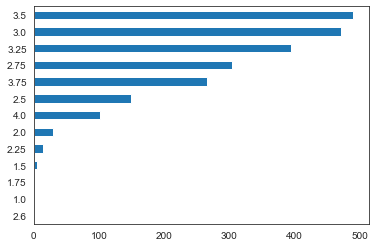

In [460]:
#Most popular rating values
choc.rating.value_counts().sort_values().plot(kind = 'barh')

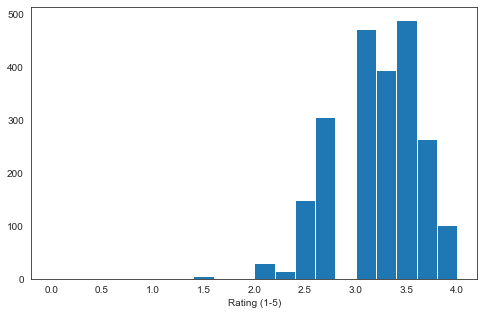

In [461]:
binsize = 0.20
bins = np.arange(0, choc['rating'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = choc, x = 'rating', bins = bins)
plt.xlabel('Rating (1-5)')
plt.show()

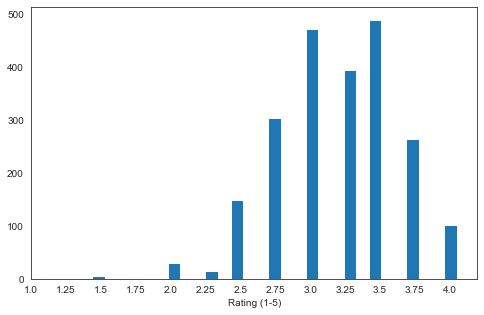

In [462]:
binsize = 0.09
bins = np.arange(0, choc['rating'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = choc, x = 'rating', bins = bins)
plt.xlim([1.0,4.2])
plt.xticks(np.arange(1.0,4.2,0.25), np.arange(1.0,4.2,0.25))
plt.xlabel('Rating (1-5)')
plt.show()

The ratings seem to fall mostly from 3 (Recommended) to 4, verging on (Outstanding).
Although numeric, the `rating` variable appears fairly discrete when plotted.  

In [463]:
choc.head(2)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN,Highly Recommended


#### Engineer variable of interest distribution : rating_category.

I'll engineer an additional categorical variable that labels each chcocolate according to the rating scale so that the rating will also be able to be plotted as a category.<br>
4.0 - 5.0 = Outstanding<br>
3.5 - 3.9 = Highly Recommended<br>
3.0 - 3.49 = Recommended<br>
2.0 - 2.9 = Disappointing<br>
1.0 - 1.9 = Unpleasant<br>

In [464]:
#https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
def rating(row):
    if row >= 4.0:
      return 'Outstanding'
    elif (row >= 3.5) & (row <= 3.9):
      return 'Highly Recommended'
    elif (row >= 3.0) & (row <= 3.49):
      return 'Recommended'
    elif (row >= 2.0) & (row <= 2.9):
      return 'Disappointing'
    elif (row <= 1.9):
      return 'Unpleasant'

In [465]:
choc['rating_category'] = choc['rating'].apply(lambda row: rating(row))

In [466]:
#convert new rating_category variable to categorical data type 
ordered_var = pd.api.types.CategoricalDtype(categories = ['Unpleasant', 'Disappointing', 'Recommended', 'Highly Recommended', 'Outstanding'], ordered = True)
choc['rating_category'] = choc['rating_category'].astype(ordered_var)

In [467]:
choc[choc['rating_category'] == "Unpleasant"]

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
154,363,Artisan du Chocolat,U.k.,2009,Brazil,Brazil Rio Doce,72.0,1.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,dominate off note,NaN,NaN,Unpleasant
396,259,Cacaoyere (Ecuatoriana),Ecuador,2008,Ecuador,Pichincha,91.0,1.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,klingy,hint of fruit,very bitter,NaN,Unpleasant
660,63,Dolfin (Belcolade),Belgium,2006,Blend,Noir,70.0,1.50,3,have_bean,have_not_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,acidic,astringent,unpleasant,NaN,Unpleasant
1404,887,Middlebury,U.S.A,2012,Blend,Houseblend,65.0,1.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,chemical,salt,wtf,NaN,Unpleasant
1479,135,Neuhaus (Callebaut),Belgium,2007,Blend,Dark,73.0,1.00,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,pastey,strong off flavor,NaN,NaN,Unpleasant
1864,693,Snake & Butterfly,U.S.A,2011,Ghana,Ghana,67.0,1.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,perfume,strong chemical,NaN,NaN,Unpleasant
2110,147,Valrhona,France,2007,Blend,Le Noir Extra Amer,85.0,1.50,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,creamy,fatty,very bitter,NaN,Unpleasant


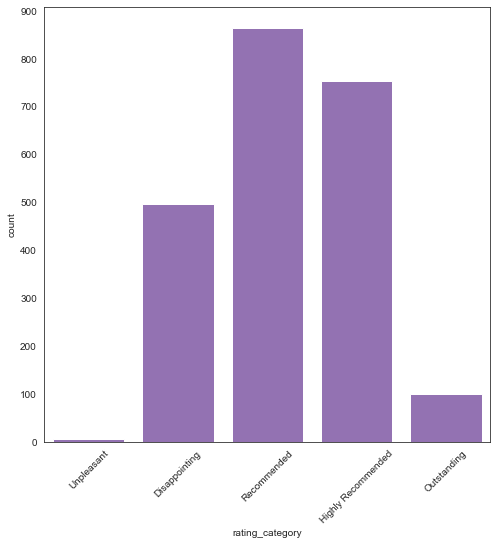

In [468]:
#Let's plot the rating_category to see how they compare to the ratings themselves.
plt.figure(figsize = [8, 8])

base_color = sb.color_palette()[4]
plt.xticks(rotation = 45)
plt.yticks(np.arange(0,1000,100), np.arange(0,1000,100))
bins = np.arange(0, 2000, 100) #this way bins are the same size

sb.countplot(data = choc, x = "rating_category", color = base_color )


This looks like a fairly normal distribution, very slightly skewed to the right.

##### Variable of interest distribution : ingredients ("beans","cocoa_butter", "vanilla","lecithin","salt","sugar","sweetener_without_sugar")  Convert to 0 / 1 values

In [469]:
#choc2 will have ingredients in 0 /1 for making numeric calculations.
choc2 = choc.copy()

In [470]:
def rating(row,not_item):
    if row == not_item:
      return 0
    else:
      return 1

In [471]:
def bool_convert(col,not_item):
    choc2[col] = choc2[col].apply(lambda row: rating(row,not_item))

In [472]:
def convert(col_dict):
    for key,value in col_dict.items():
        bool_convert(key,value)

In [473]:
#convert these columns to integer values
cols_to_convert = {'beans':'have_not_bean',
        'sugar':'have_not_sugar',
        'cocoa_butter': 'have_not_cocoa_butter',
        'vanilla':'have_not_vanila',
        'lecithin':'have_not_lecithin',
        'salt':'have_not_salt',
        'sweetener_without_sugar':'have_not_sweetener_without_sugar'}

convert(cols_to_convert)

In [474]:
#convert to integer
ingred = ["beans","cocoa_butter", "vanilla","lecithin","salt","sugar","sweetener_without_sugar"]
for i in ingred:
    choc2[i] = choc2[i].astype(int)

In [475]:
choc2.head(2)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,1,1,0,0,0,1,0,cocoa,blackberry,full body,NaN,Highly Recommended
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,1,1,0,0,0,1,0,cocoa,vegetal,savory,NaN,Highly Recommended


In [476]:
# Use melt to combine all ingredients into a single column
ingredients = choc2.melt(id_vars = ['specific_bean_origin_or_bar_name','rating'],
                                     value_vars = ['beans','cocoa_butter', 'vanilla', 'lecithin','salt','sugar','sweetener_without_sugar'], var_name = 'ingredients', value_name = 'contains').dropna()

In [477]:
ingredients.head(2)

,specific_bean_origin_or_bar_name,rating,ingredients,contains
0,"Bejofo Estate, batch 1",3.75,beans,1
1,"Zorzal, batch 1",3.50,beans,1


In [478]:
total_ingred = ingredients.groupby('ingredients').sum().reset_index()
total_ingred.sort_values(by=['contains'], ascending=False, inplace=True)

In [479]:
total_ingred

,ingredients,rating,contains
0,beans,7113.6,2224
4,sugar,7113.6,2142
1,cocoa_butter,7113.6,1535
2,lecithin,7113.6,479
6,vanilla,7113.6,348
5,sweetener_without_sugar,7113.6,76
3,salt,7113.6,37


<Figure size 720x720 with 0 Axes>

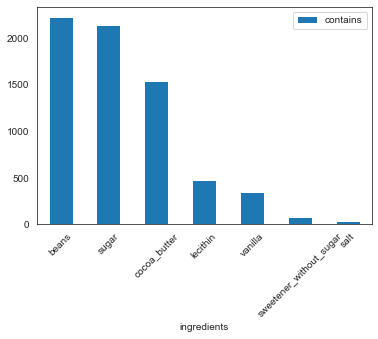

In [480]:
plt.figure(figsize = [10, 10])
ax = total_ingred.plot.bar(x='ingredients', y='contains', rot=0)
plt.xticks(rotation = 45);


This bar plot shows the distribution of total ingredients across all bars. We see that all bars have chocolate beans and most have sugar. I was not aware of this before, but not all chocolate has cocoa_butter. It, like lecithin, acts as an emulsifier, that allows chocolate to flow easily and give it a better mouth feel. It will be interesting to see how these ingredients correlate with ratings.

In [481]:
choc[choc['cocoa_butter'] == "have_not_cocoa_butter"].head(5)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
28,1462,Acalli,U.S.A,2015,Peru,"Chulucanas, El Platanal, batch 001",70.0,3.75,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,yellow fruit,NaN,NaN,NaN,Highly Recommended
29,1470,Acalli,U.S.A,2015,Peru,"Tumbes, Norandino",70.0,3.75,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,nutty,cherry,cocoa,Highly Recommended
30,2470,Acalli,U.S.A,2020,Peru,"Barataria, El Plantal and Norandino Tumbes blend",70.0,3.50,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,hot cocoa,rich,molasses,NaN,Highly Recommended
31,2462,Acalli,U.S.A,2020,Mexico,"Teapa, Tabasco, batch 2",74.0,3.25,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,herbal,molasses,hammy,NaN,Recommended
36,2438,Aelan,Vanuatu,2019,Vanuatu,"EPI Island, batch E 11/19",70.0,3.00,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,woody,spicy,sweet,Recommended


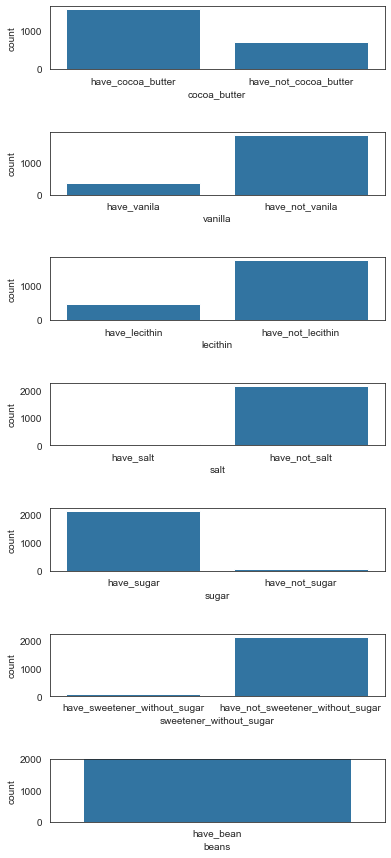

In [482]:
# let's plot all 6 together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=7, figsize = [6,15])

default_color = sb.color_palette()[0]
sb.countplot(data = choc, x = 'cocoa_butter', color = default_color, ax = ax[0])

sb.countplot(data = choc, x = 'vanilla', color = default_color, ax = ax[1])
sb.countplot(data = choc, x = 'lecithin', color = default_color, ax = ax[2])
sb.countplot(data = choc, x = 'salt', color = default_color, ax = ax[3])
sb.countplot(data = choc, x = 'sugar', color = default_color, ax = ax[4])
sb.countplot(data = choc, x = 'sweetener_without_sugar', color = default_color, ax = ax[5])
sb.countplot(data = choc, x = 'beans', color = default_color, ax = ax[6])
#ax.set_ylim([0,2000])
plt.ylim(0, 2000)

plt.subplots_adjust(hspace = 1)
plt.show()

#### Variable of interest distribution : first_taste, second_taste, third_taste

In [483]:
choc.head(1)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended


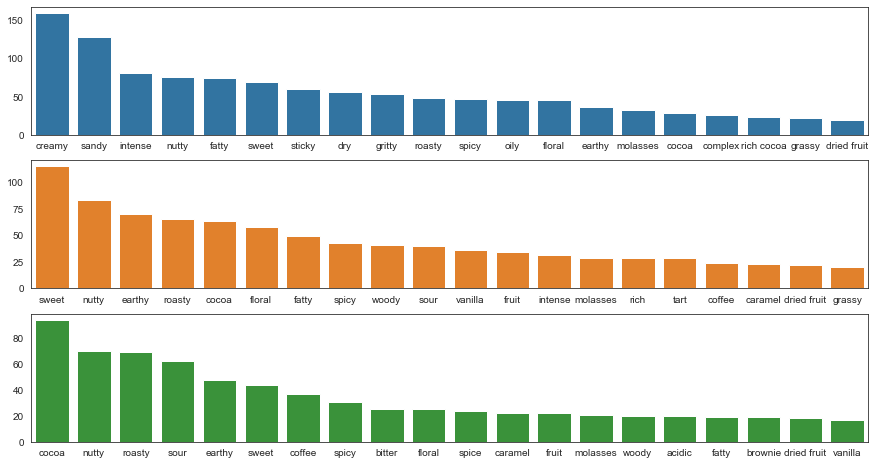

In [484]:
#top 20 first,second, third taste distributions

fig, ax = plt.subplots(nrows=3, figsize = [15,8]);

#first taste
sb.barplot(x=choc.first_taste.value_counts()[:20].index,
           y=choc.first_taste.value_counts()[:20].values,
           color = sb.color_palette()[0],
           ax = ax[0]);
#second taste
sb.barplot(x=choc.second_taste.value_counts()[:20].index,
           y=choc.second_taste.value_counts()[:20].values,
           color = sb.color_palette()[1],
           ax = ax[1]);
#third taste
sb.barplot(x=choc.third_taste.value_counts()[:20].index,
           y=choc.third_taste.value_counts()[:20].values,
           color = sb.color_palette()[2],
           ax = ax[2]);


It looks like some tastes are repeated in the first, second, and third categories (creamy, nutty, sweet, etc. I wonder which tastes correspond with the highest rating. Which tastes correspond with the lowest ratings? Under first taste, I see "sandy, dry, and gritty" which doesn't strike me as a pleasant taste/textures. I wonder how those chocolates are rated?

#### Variable of interest distribution : country_of_bean_origin, company

Text(0.5, 1.0, 'Companies with the most bars')

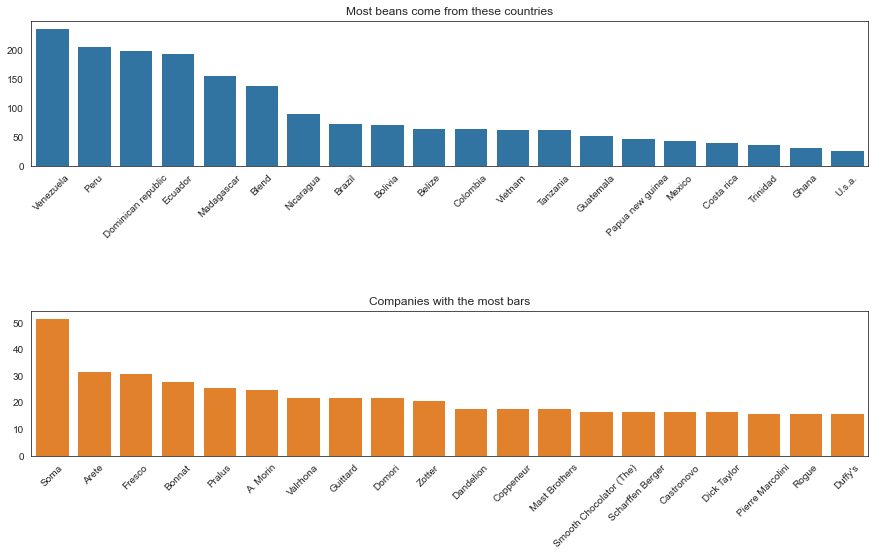

In [485]:
fig, ax = plt.subplots(nrows=2, figsize = [15,8]);

#countries where most of the beans come from (top 20)
sb.barplot(x=choc.country_of_bean_origin.value_counts()[:20].index,
           y=choc.country_of_bean_origin.value_counts()[:20].values,
           color = sb.color_palette()[0],
           ax = ax[0]);
ax[0].tick_params(axis='x', rotation=45)

#company with the most bars (top 20)
sb.barplot(x=choc.company.value_counts()[:20].index,
           y=choc.company.value_counts()[:20].values,
           color = sb.color_palette()[1],
           ax = ax[1]);
ax[1].tick_params(axis='x', rotation=45)
plt.subplots_adjust(hspace = 1)
ax[0].set_title('Most beans come from these countries')
ax[1].set_title('Companies with the most bars')
#plt.title(label="Top 20 tastes in the Outstanding rating category", fontsize=12, color="black")
#plt.xticks(rotation = 45);

**Graph1:** This data set has chocolate bars where most of the beans are sourced from countries like Venezuela, Peru, the Dominican Republic, and Ecuador. I didn't realize that the United States grew beans. However on a closer look, Hawaii is the only state that has the climate to support it.

**Graph2:** Looking at the graph, Companies that have the most bars in this dataset are Soma, Arete, and Fresco. I have never heard of them which is interesting.

#### Variable of interest distribution : cocoa_percents

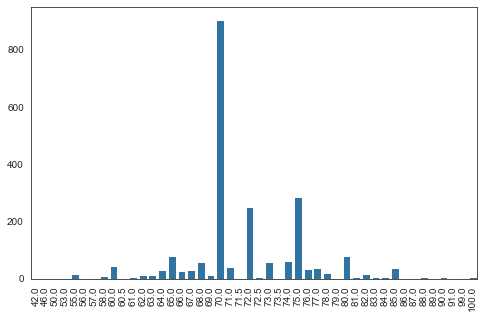

In [486]:
plt.figure(figsize=[8, 5])

percent = choc.cocoa_percent.value_counts().index
percent_counts = choc.cocoa_percent.value_counts().values
sb.barplot(x=percent[:100],
           y=percent_counts[:100],
           color = sb.color_palette()[0],
          );
plt.xticks(rotation = 90);

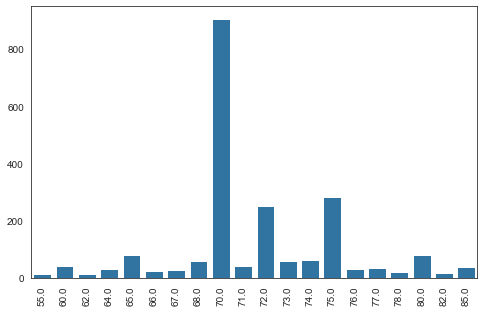

In [487]:
#Let's take a closer look at the graph above
plt.figure(figsize=[8, 5])

percent = choc.cocoa_percent.value_counts().index
percent_counts = choc.cocoa_percent.value_counts().values
sb.barplot(x=percent[:20],
           y=percent_counts[:20],
           color = sb.color_palette()[0],
          );
plt.xticks(rotation = 90);

Most chocolate in this dataset falls in the 70% cocoa category.  Does this correspond with rating or other factors?

#### Variable of interest distribution : counts_of_ingredients

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9129ee110>]],
      dtype=object)

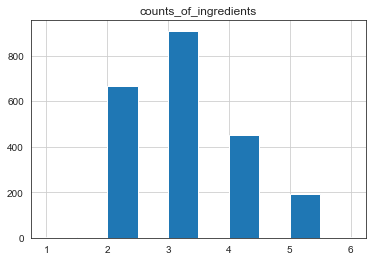

In [488]:
choc.hist('counts_of_ingredients')

It looks like most of the chocolate bars have 3 ingredients. It is slightly right skewed. It will be interesting to see if there is a correlation between number of ingredients, and if specific ones correlate with higher ratings. 

In [489]:
choc.first_taste.value_counts().shape

(456,)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
**rating**: Main variable of interest. The distribution was fairly normal although slightly more right skewed. Although it is a numerical float value (from 1-5), it still plots as fairly discrete. I engineered a new column *rating_categories* (explained below under *Tidy*).

**Ingredients** : I engineered new column *ingredients* in a separate dataframe using melt.
I also converted all ingredient values to 0 / 1  so that they would be easier to use in calculations. The plot for total number of *ingredients* was pretty intuitive with the most to least ingredients - beans, sugar, cocoa_butter, lecithin, vanilla, sweetener_without_sugar, salt. However I was not aware of the role that cocoa_butter and lecithin played in chocolate production as an emulsifier.

**first_taste,second_taste,third_taste**: I plotted these with bar plots one after the other to compare them. Since there are 456 unique first_tastes, it would not be possible for me to plot each one, so I chose the Top 20 tastes for each overall, based on value_counts(). It will be interesting to see how these tastes plot against rating categories! At this point I don't see any unusual tastes. 
-- taste_one : creamy, sandy, intense, nutty, fatty
-- taste_two : sweet nutty earthy, roasty cocoa floral, fatty
-- taste_three : cocoa, nutty, roasty, sour, earthy, sweet

**country_of_origin, company**: I plotted the country_of_origin above the company to see if they similar in any way. The result was pretty intuitive if you know that chocolate beans are grown in warm humid climates. However, I was surpised to see the United States on the list but then remembered that Hawaii has a nice warm humid climate.  Of the top 5 companies represented, I only recognized 1 - Pralus. 
-- Venezuela, Peru, Dominican Republic, Ecuador, Madagascar ...
-- Soma, Arete, Fresco, Bonnat, Pralus, ...

**cocoa_percent**: I read in the data set description that most of the chocolate reviewd was 55% and above which qualifies as all dark chocolate.  In this way I was not surprised to that most of the chocolate was in the darker range. However, I was surprised at how discrete the data plotted. It was not continuous at all. I also found that a huge majority fell at 70%. In order of frequency of percent cocoa high to low :  
- 70,75,72,80 & 65, 68, 73, 74

**counts_of_ingredients**: In this plot I discovered that most chocolate has very few ingredients (1-6). Most chocolate only has 3 or 4 ingredients.  I was surpised to see salt as an ingredient, as well as lecithin and cocoa butter. In order of frequency : 
- 3,2,4,5,6-1  number of ingredients high frequency to low


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the variable distributions I cover in the section above. 

**Tidy** :
- Engineer new variable *rating_category* : To group ratings categorically as well as numerically using the *ratings* variable. 

- Creat a separate *ingredients* dataframe and used melt to convert ingredients columns (beans, cocoa_butter, vanilla, lecithin, salt, sugar, sweetener_without_sugar) to rows to be able run value_counts() to calculate number of ingredients.  I converted each ingredient value to 0 / 1 to be able to treat them numerically. I stored their values in a new column called *contains*.
<pre>
specific_bean_origin_or_bar_name	rating	ingredients	contains
0	Bejofo Estate, batch 1	3.75	beans	1
</pre>

## Bivariate Exploration

In [490]:
choc2.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,1,1,0,0,0,1,0,cocoa,blackberry,full body,NaN,Highly Recommended
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,1,1,0,0,0,1,0,cocoa,vegetal,savory,NaN,Highly Recommended
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,1,1,0,0,0,1,0,rich cocoa,fatty,bready,NaN,Recommended
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,1,1,0,1,0,1,0,fruity,melon,roasty,NaN,Highly Recommended
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,1,1,0,1,0,1,0,vegetal,nutty,NaN,NaN,Highly Recommended


In [491]:
ingredients.head(1)

,specific_bean_origin_or_bar_name,rating,ingredients,contains
0,"Bejofo Estate, batch 1",3.75,beans,1


#### Correlation plot against all numeric data

In [492]:
numeric_vars = ['cocoa_percent', 'rating', 'counts_of_ingredients', 'sugar','salt','lecithin','vanilla','cocoa_butter','sweetener_without_sugar']
numeric_vars2 = ['cocoa_percent', 'rating', 'counts_of_ingredients']
categoric_vars = ['rating_category', 'first_taste', 'second_taste']

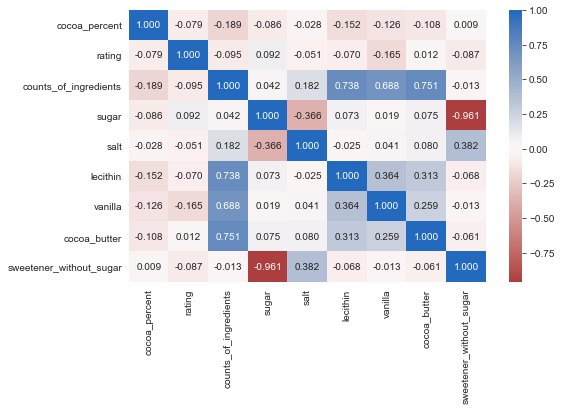

In [493]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(choc2[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Negative correlation between number of ingredients and cocoa percent is shown. This makes some sense, as the fewer the ingredients the more the cocoa? There seems to be positive correlation between rating and especially sugar, but also slightly with cocoa butter. However, all other ingredients including cocoa percent are negatively correlated -- especially vanilla. One surprising thing is that salt correlates with sweetener_without_sugar. Let's explore these further.

#### Bivariate plot :  rating (numbers) vs ingredients

Curious how vanilla rating seemed to be negatively correlated with rating.
choc.

In [494]:
lecithin = choc.groupby(by="rating").sum().reset_index()
lecithin.head()

,rating,ref,review_date,cocoa_percent,counts_of_ingredients
0,1.00,135,2007,73.0,5
1,1.50,2049,10044,378.0,19
2,1.75,363,2009,72.0,3
3,2.00,13452,58259,2137.0,120
4,2.25,19884,28201,1021.0,38


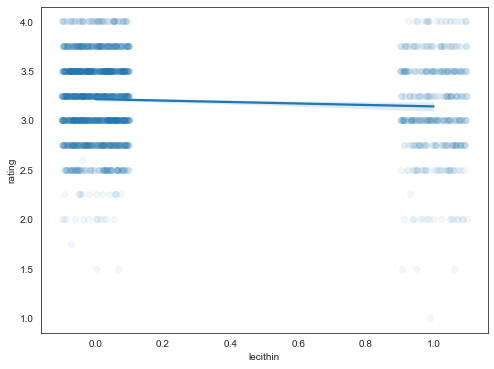

In [495]:
plt.figure(figsize = [8,6]) #make graph bigger
g = sb.regplot(data = choc2, x = 'lecithin', y = 'rating', x_jitter = 0.1, scatter_kws = {'alpha': 1/18 },fit_reg = True);

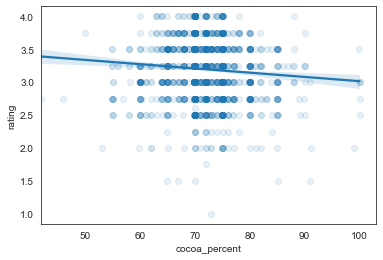

In [496]:
g = sb.regplot(data = choc2, x = 'cocoa_percent', y = 'rating', x_jitter = 0.1, scatter_kws = {'alpha': 1/9 },fit_reg = True);

Although these two graphs are fairly subtle, we can see that there is a negative correlation between lecithin & cocoa_percent vs. rating.  Let's look at more ingredients against ratings in the next section.

#### Bivariate plot :  Scatter plot with all ingredients and average ratings.

In [497]:
total_ingred = ingredients.groupby(['ingredients','rating']).sum().reset_index()
total_ingred.head(2);

In [498]:
#total_ingred.sort_values(by=['contains'], ascending=False, inplace=True)

In [499]:
ing_rating_mean = ingredients.groupby(['ingredients','rating']).mean().reset_index()
ing_rating_mean.tail(50);

<Figure size 1152x360 with 0 Axes>

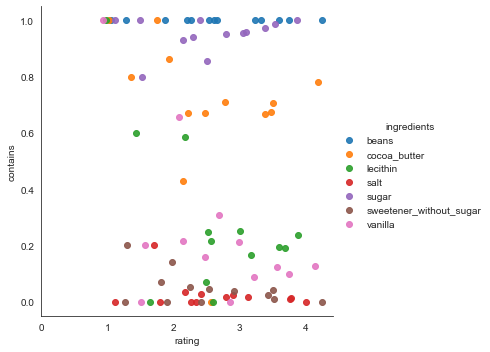

In [500]:
plt.figure(figsize = [16, 5])

g = sb.FacetGrid(data = ing_rating_mean, hue = 'ingredients', height = 5)
#g.map(plt.scatter, 'rating','contains')


g = g.map(sb.regplot, 'rating','contains', x_jitter = 0.3, fit_reg = False, scatter_kws={'alpha':0.90});
x_ticks = [0,1,2,3,4]
g.set(xticks = x_ticks, xticklabels = x_ticks)
#g.set(yscale = 'log') # need to set scaling before customizing ticks
#x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
#g.set(xticks = x_ticks, xticklabels = x_ticks)
#plt.xticks(rotation = 90);
g.add_legend()

This scatterplot is a little harder to interpret, however it gives a contrasting view to the ingredient / rating relationship.  At the top left we see that most highly rated chocolates have beans, sugar, and cocoa butter. Other highly rated chocolates less frequently contain lecithin, vanilla, and sweetener without sugar. These might be outliers.

In [501]:
salt = ing_rating_mean[ing_rating_mean['ingredients'] == "salt"]
salt;

In [502]:
salt.ingredients.value_counts()

salt    13
Name: ingredients, dtype: int64

<Figure size 1152x360 with 0 Axes>

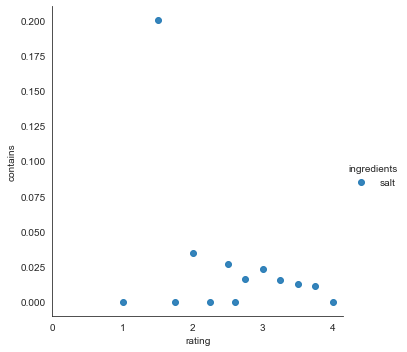

In [503]:
plt.figure(figsize = [16, 5])

g = sb.FacetGrid(data = salt, hue = 'ingredients', height = 5)
g = g.map(sb.regplot, 'rating','contains', x_jitter = 0, fit_reg = False, scatter_kws={'alpha':0.90});
x_ticks = [0,1,2,3,4]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend()

Here we isolate salt so we can see the trend more clearly. Salt occurs much less in highly rated chocolates. However there is one point that may be an outlier. 

In [504]:
choc.head(1);

In [505]:
s = choc[choc['salt'] == "have_salt"].reset_index()

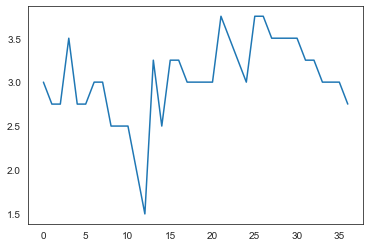

In [506]:
s.rating.plot()

In [507]:
salt_outlier = s[s["rating"] < 2]
salt_outlier

,index,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
12,1404,887,Middlebury,U.S.A,2012,Blend,Houseblend,65.0,1.5,4,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,chemical,salt,wtf,NaN,Unpleasant


It looks like there is one "outlier" chocolate bar that is driving the average rating of chocolate bars containing salt down. It has a low rating (1.5), more ingredients than average (4), no sugar, and first taste (chemical), second (salt), and third (wft) -- not a good sign!

#### Bivariate plot :  rating_categories vs cocoa percent using box & FacetGrid plots

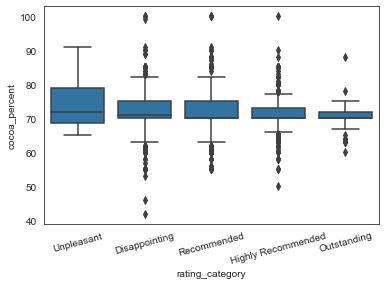

In [508]:
#box plot : rating_categories vs cocoa_percent
base_color = sb.color_palette()[0]
sb.boxplot(data = choc2, x = "rating_category", y = "cocoa_percent", color = base_color);
plt.xticks(rotation = 15);

<Figure size 360x1080 with 0 Axes>

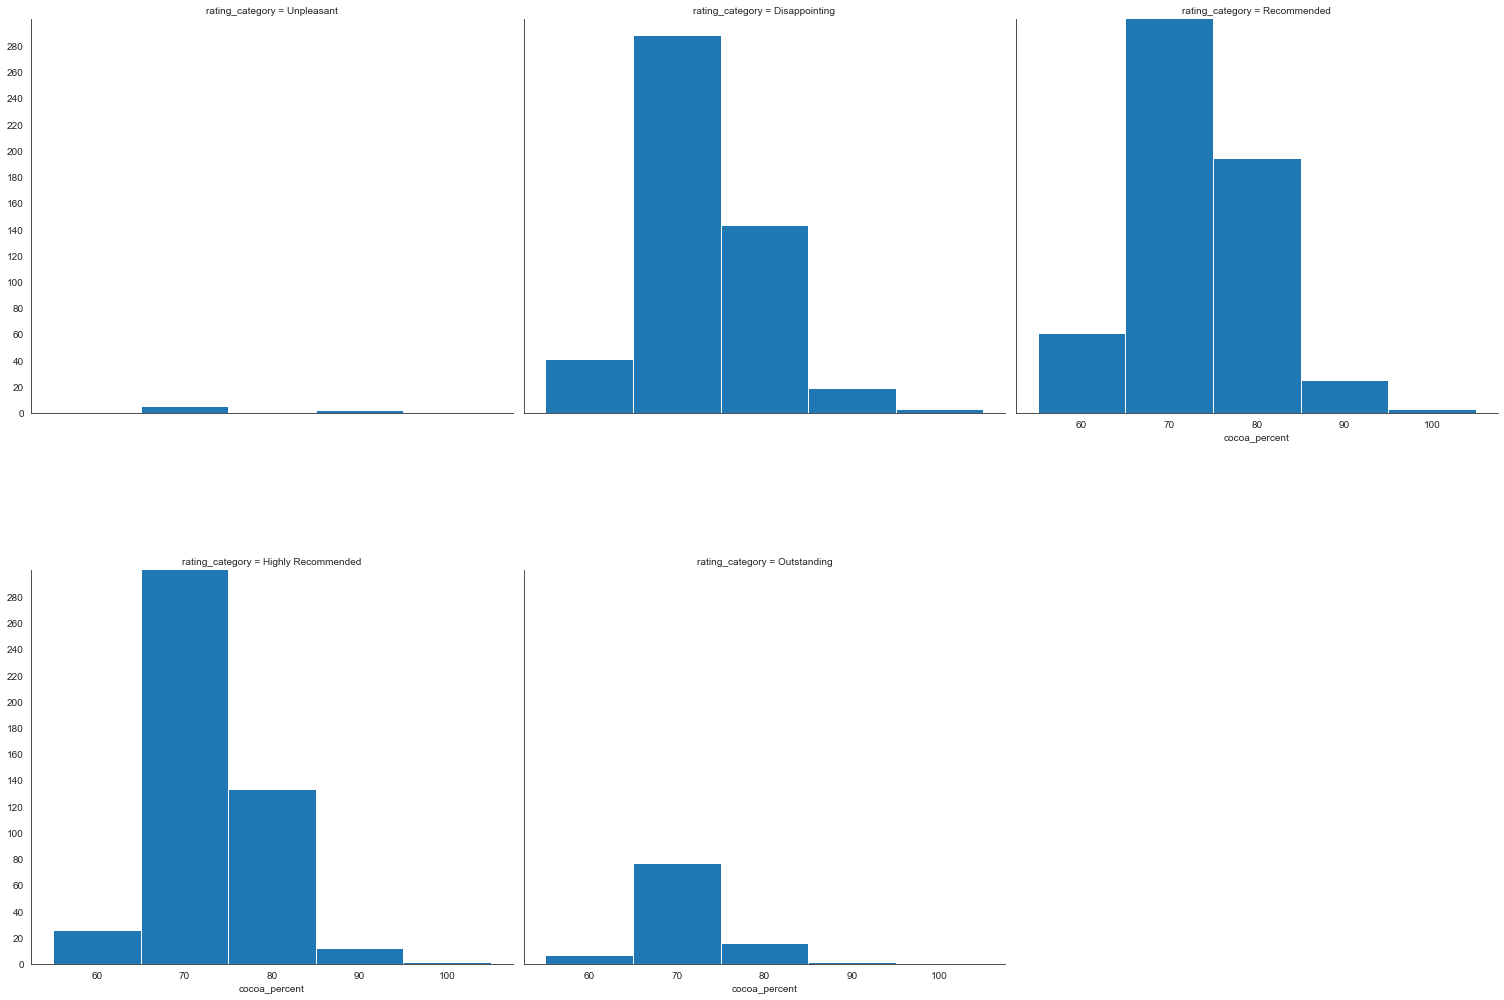

In [509]:
#FacetGrid : rating_categories vs cocoa_percent
plt.figure(figsize = [5,15])
g = sb.FacetGrid(data = choc2, 
                 col = 'rating_category', 
                 col_wrap =3, height=7,
                 ylim=(0, 300)); 
yticks = np.arange(0,300,20)
ylabels = ['{}'.format(v) for v in yticks]

bins = np.arange(55, choc2.cocoa_percent.max() + 10, 10) #this way 
g.map(plt.hist,'cocoa_percent', bins=bins); #quantitative
#plt.rcParams["axes.labelsize"] = 15

#g.set(xlim=(300, 20000))
#g.set(ylim=(0, 300))
plt.yticks(yticks, ylabels);
#plt.xticks(xticks, xlabels);
plt.subplots_adjust(hspace = 0.4);


Outstanding category has a narrow range of 70-73% .  The unpleasant category has a higher average percentage cocoa.
Facet Grid shows more clearly each percent by category than the box plot does.

#### Bivariate plot :  rating_categories to number of total ingredients in each bar (0-6 possible)

<Figure size 576x576 with 0 Axes>

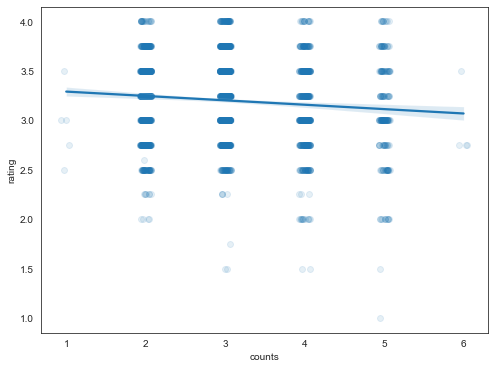

In [510]:
# counts_of_ingredients vs rating
plt.figure(figsize = [8, 8])

# subplot 1: color vs cut
plt.figure(figsize = [8,6]) #make graph bigger
g = sb.regplot(data = choc, x = 'counts_of_ingredients', y = 'rating', x_jitter = 0.07, scatter_kws = {'alpha': 1/9 },fit_reg = True);
#g.set(xlim=(0, 18000))
#g.set(ylim=(0, 3))

plt.xlabel('counts')
plt.ylabel('rating');

As the number of ingredients increase, the rating goes down slightly

#### Bivariate plot :  Top 20 Tastes in the Outstanding category

In [511]:
choc.rating_category.value_counts();

In [512]:
#outstanding chocolate dataframe
outstanding = choc[choc['rating_category'] == "Outstanding"]
#outstanding.head()

outstanding_tastes = outstanding.melt(id_vars = ['specific_bean_origin_or_bar_name','rating_category'],
                                     value_vars = ['first_taste','second_taste','third_taste'], var_name = 'tastes', value_name = 'contains').dropna()
#outstanding_tastes.head(10)
#outstanding_tastes.contains.value_counts().plot()

In [513]:
outstanding_tastes.shape

(272, 4)

In [514]:
#top tastes in oustanding category
top_tastes = outstanding_tastes['contains'].value_counts(sort=True).nlargest(20)
mask = np.isin(outstanding_tastes['contains'],top_tastes.index)

In [515]:
#Number of unique tastes in the Outstanding category. (Includes first,second,and third tastes)
len(outstanding_tastes.contains.value_counts().index)

118

In [516]:
top_20_tastes = outstanding_tastes[mask]

In [517]:
top_20_tastes.head(5)

,specific_bean_origin_or_bar_name,rating_category,tastes,contains
4,Morobe,Outstanding,first_taste,tart
5,"Monte Alegre, 3 diff. plantations",Outstanding,first_taste,creamy
6,Chuno,Outstanding,first_taste,creamy
7,"Coto Brus, Terciopelo",Outstanding,first_taste,balanced
8,Phantom,Outstanding,first_taste,creamy


Text(0.5, 1.0, 'Top 20 tastes in the Outstanding rating category')

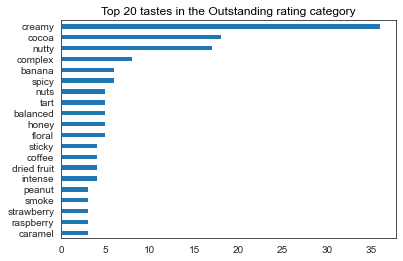

In [518]:
top_20_tastes.contains.value_counts().sort_values().plot(kind = 'barh')
#top_20_tastes.contains.value_counts()
plt.title(label="Top 20 tastes in the Outstanding rating category", 
          fontsize=12,
          color="black")

We sample the Outstanding rating_category to see the top 20 tastes in that category.   Creamy, cocoa, nutty, complex, spicy, banana, honey, balance, nuts, tart, etc. (This includes the first, second, and third tastes collectively.) We only choose the top 20 tastes because there are 118 tastes in the Outstanding category.

In [519]:
choc.company.value_counts();

In [520]:
top_20_tastes;

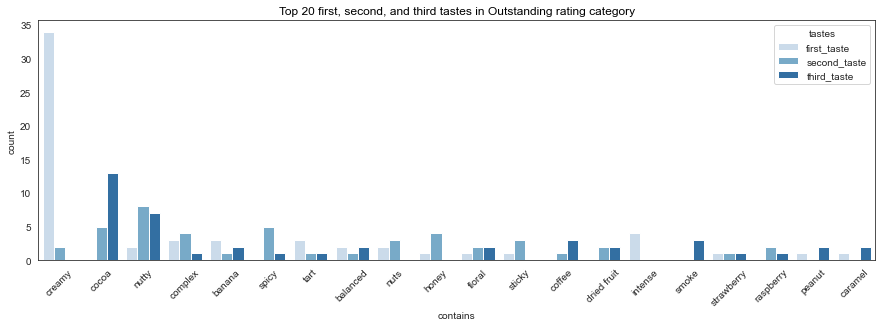

In [521]:
#top 20 tastes in Outstanding category
plt.figure(figsize = [15, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
plt.xticks(rotation = 45)
plt.title(label="Top 20 first, second, and third tastes in Outstanding rating category", 
          fontsize=12,
          color="black")

sb.countplot(data = top_20_tastes, x = 'contains', hue = 'tastes', palette = 'Blues', order =top_20_tastes.contains.value_counts().index)

We break down the plot in the Outstanding rating category further by tastes (first_taste, second_taste_third_taste). First_taste is dominated by creamy - a popular feature. The second_taste is dominated by cocoa, nutty, spicy.  The third_taste is cocoa, nutty, coffee.  If you were to "engineer" an outstanding chocolate bar description from this, you might say : "A *creamy* mouthfeel with a *chocolaty*, *nutty* character with a touch of *spice*."

#### Bivariate Plot : country_of_bean_origin & company - "Top 20 country_of_bean_origin used by the highest unique number of  companies per origin."

In [522]:
#specific_bean_origin_or_bar_name is dominated by bean origin names, not individual bar names as we see below. Or perhaps the bar name is just named for the bean origin, so I'll focus of the variable country_of_bean_origin.
choc.specific_bean_origin_or_bar_name.value_counts()[:5]

Madagascar            52
Ecuador               38
Peru                  36
Dominican Republic    35
Chuao                 25
Name: specific_bean_origin_or_bar_name, dtype: int64

In [523]:
choc[choc['specific_bean_origin_or_bar_name'] == 'Madagascar'].sort_values(by='rating').head(3)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
1473,1403,Nathan Miller,U.S.A,2014,Madagascar,Madagascar,73.5,2.5,2,have_bean,have_not_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,intense,pungent,sour fruit,NaN,Disappointing
1375,841,Menakao (aka Cinagra),Madagascar,2012,Madagascar,Madagascar,72.0,2.5,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,uneven,smokey,hammy,NaN,Disappointing
1374,837,Menakao (aka Cinagra),Madagascar,2012,Madagascar,Madagascar,80.0,2.5,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sticky,tart,slight burnt,NaN,Disappointing


In [524]:
#non unique counts. We need to get the unique company counts
choc.groupby(['country_of_bean_origin'])['company'].count().head(3)

country_of_bean_origin
Australia      3
Belize        65
Blend        140
Name: company, dtype: int64

In [525]:
unique_company_counts = choc.groupby( [ "country_of_bean_origin",] )[['company']].agg(list).reset_index()
unique_company_counts;

In [526]:
print(set(unique_company_counts.loc[unique_company_counts['country_of_bean_origin'] == "Blend"].company.values[0]))


{'Chocolate Alchemist-Philly', 'Claudio Corallo', 'Domori', 'Bonnat', 'Guittard', 'Burnt Fork Bend', 'Luker', 'Tejas', 'Heinde & Verre', 'Habitual', 'Pralus', 'Patric', 'La Maison du Chocolat (Valrhona)', 'Sacred', 'Dolfin (Belcolade)', 'Chocovic', 'TCHO', "Marigold's Finest", 'Olive and Sinclair', 'Dick Taylor', 'Soma', 'Original Beans (Felchlin)', 'DAR', 'Michel Cluizel', 'Theo', 'Zokoko', 'Videri', 'Mast Brothers', 'Park 75', 'Amedei', 'Casa', 'Bahen & Co.', 'Bittersweet Origins', 'Middlebury', 'Laia aka Chat-Noir', 'Zotter', 'Escazu', 'Lillie Belle', 'Valrhona', 'Guido Castagna', 'Solstice', "Ethel's Artisan (Mars)", 'Palette de Bine', 'Felchlin', 'Matale', 'Scharffen Berger', "Zak's", 'Davis', 'Ritual', 'Blanxart', 'Olivia', 'Lindt & Sprungli', "Green & Black's (ICAM)", "L'Amourette", 'Neuhaus (Callebaut)', 'Naive', 'Map Chocolate', 'Pierre Marcolini', 'C-Amaro', 'Damson', 'Metropolitan', 'Finnia', 'Coppeneur', 'Bernachon'}


In [527]:
def f(x):
    return len(set(x))
unique_company_counts['unique_companies_per_country'] = unique_company_counts['company'].apply(f)
unique_company_counts.head(1)

,country_of_bean_origin,company,unique_companies_per_country
0,Australia,"[Daintree, Daintree, Smooth Chocolator (The)]",2


In [528]:
#df4 = df3.groupby( [ "country_of_bean_origin",] )['company'].value_counts().to_frame(name = 'count').reset_index()

In [529]:
choc[choc['country_of_bean_origin'] == 'El salvador']

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
1380,1494,Mesocacao,Honduras,2015,El salvador,El Salvador,70.0,3.00,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,dairy,caramel,NaN,NaN,Recommended
1381,1494,Mesocacao,Honduras,2015,El salvador,El Salvador,80.0,2.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,bitter,woody,roasty,Disappointing
1469,2418,Naive,Lithuania,2019,El salvador,"Finca Concepcion, nano-lot",70.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,bold,savory,creamy,NaN,Recommended
2177,2374,Xocolatisimo,El salvador,2019,El salvador,Hacienda San Jose,70.0,3.25,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,nutty,basic cocoa,NaN,NaN,Recommended
2178,2378,Xocolatisimo,El salvador,2019,El salvador,Hacienda San Jose,75.0,3.00,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,coarse,sweet,candy,licorice,Recommended
2179,2374,Xocolatisimo,El salvador,2019,El salvador,Hacienda San Jose,65.0,2.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,overly sweet,dirty,NaN,NaN,Disappointing


In [530]:
#Check to make sure that the unique company count is correct for El Salvador (should be 3)
unique_company_counts[unique_company_counts['country_of_bean_origin'] == 'El salvador']

,country_of_bean_origin,company,unique_companies_per_country
14,El salvador,"[Mesocacao, Mesocacao, Naive, Xocolatisimo, Xocolatisimo, Xocolatisimo]",3


In [531]:
choc.company.value_counts();

In [532]:
choc.company_location.value_counts();

In [533]:
#group country_of_bean_origin by company to get unique company names for each country_bean_of_origin 
country = choc.groupby(['country_of_bean_origin','company'])['specific_bean_origin_or_bar_name'].count().reset_index()


In [534]:
#Note that Daintree company is listed in Australia twice.
choc[choc['country_of_bean_origin'] == 'Australia']

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
563,785,Daintree,Australia,2011,Australia,"Daintree Estates, N. Queensland",70.0,3.25,5,have_bean,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vanilla,banana,citrus,NaN,Recommended
564,1654,Daintree,Australia,2015,Australia,Goodman Estate,70.0,2.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,sandy,candy like vanilla,off,NaN,Disappointing
1857,1864,Smooth Chocolator (The),Australia,2016,Australia,Australia,67.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,delicate,smooth,dairy,NaN,Highly Recommended


In [535]:
unique_company_counts.head(1)

,country_of_bean_origin,company,unique_companies_per_country
0,Australia,"[Daintree, Daintree, Smooth Chocolator (The)]",2


In [536]:
unique_company_counts.sort_values(by="unique_companies_per_country", ascending=False);

In [537]:
country.country_of_bean_origin.value_counts();

In [538]:
#countries with the most companies
country.country_of_bean_origin.value_counts().index

Index(['Peru', 'Dominican republic', 'Ecuador', 'Madagascar', 'Venezuela',
       'Blend', 'Tanzania', 'Belize', 'Bolivia', 'Brazil', 'Nicaragua',
       'Vietnam', 'Colombia', 'Guatemala', 'Papua new guinea', 'Mexico',
       'Trinidad', 'Costa rica', 'Ghana', 'Haiti', 'Honduras', 'Jamaica',
       'India', 'Grenada', 'Indonesia', 'Philippines', 'U.s.a.', 'Fiji',
       'Uganda', 'Sao tome', 'Cuba', 'Congo', 'Vanuatu', 'Solomon islands',
       'Panama', 'Puerto rico', 'St. lucia', 'Ivory coast', 'Malaysia',
       'Sierra leone', 'Liberia', 'El salvador', 'Thailand', 'Nigeria',
       'Australia', 'Cameroon', 'Taiwan', 'Sri lanka', 'Samoa', 'Gabon',
       'Sao tome & principe', 'Sulawesi', 'Martinique', 'Burma', 'Tobago',
       'St.vincent-grenadines', 'Suriname', 'Togo', 'Principe', 'Dr congo',
       'Sumatra'],
      dtype='object')

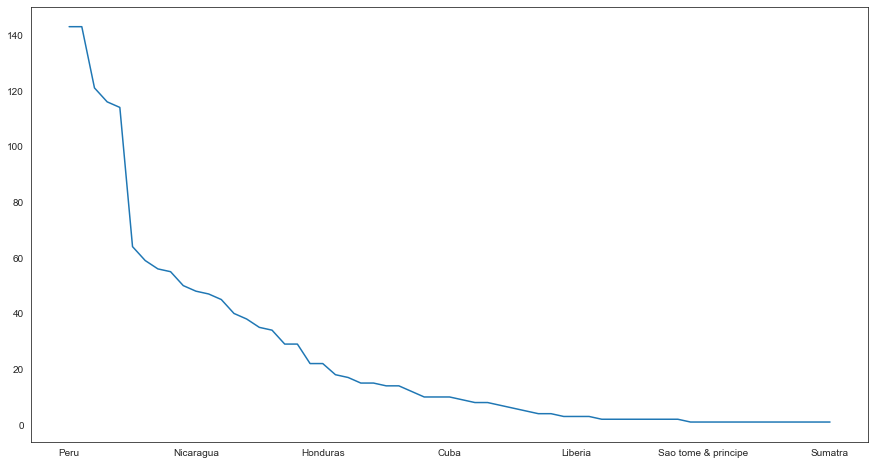

In [539]:
#High level view of countries of bean origin with the most number of unique companies using their beans
fig, ax = plt.subplots(nrows=1, figsize = [15,8]);
country.country_of_bean_origin.value_counts().plot()

Text(0.5, 1.0, 'Top 20 country_of_bean_origin used by the highest number of unique companies.')

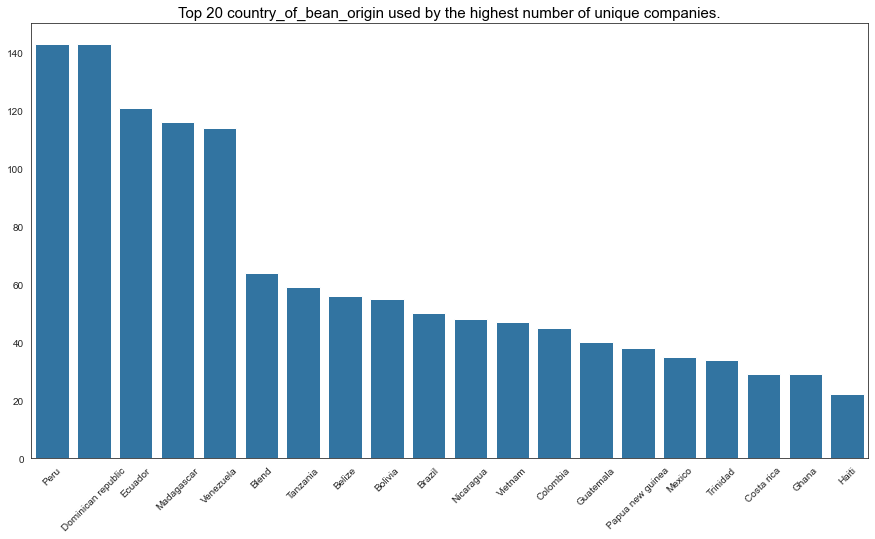

In [540]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8]);
sb.barplot(x=country.country_of_bean_origin.value_counts(sort=True)[:20].index,
           y=country.country_of_bean_origin.value_counts(sort=True)[:20].values,
           color = sb.color_palette()[0],
           ax = ax);
ax.tick_params(axis='x', rotation=45)
plt.title(label="Top 20 country_of_bean_origin used by the highest number of unique companies.", 
          fontsize=15,
          color="black")

Beans are sourced from different countries (country_of_bean_origin). The most popular by unique company counts per origin are : Peru, Dominican Republic, Ecuador, Madagascar, and Venezuela. How does this compare with other variables, like rating and flavors?

#### Bivariate Plots : Top Country Ratings - company_location, country_of_bean_origin, specific_bean_origin_or_bar_name	

In [541]:
choc.head(1)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended


In [542]:
#get mean rating by company_location
company_location = choc.groupby(['company_location'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

In [543]:
company_location.head()

,company_location,rating
7,Chile,3.750
0,Argentina,3.500
45,Sao tome,3.500
41,Poland,3.500
60,U.a.e.,3.375


In [544]:
company_location.rating.iloc[:20].value_counts().index.sort_values()

Float64Index([3.2564102564102564, 3.2583333333333333, 3.2634730538922154,
              3.2642857142857142, 3.2717391304347827,                3.3,
              3.3069620253164556,             3.3125,  3.313953488372093,
                           3.325, 3.3333333333333335,  3.338709677419355,
                            3.35, 3.3676470588235294,              3.375,
                             3.5,               3.75],
             dtype='float64')

In [545]:
#get mean rating by specific_bean_origin_or_bar_name
bar_name = choc.groupby(['specific_bean_origin_or_bar_name'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
bar_name.head(1)


,specific_bean_origin_or_bar_name,rating
1211,"Solomon Is.,batch 17158, N.Vela",4.0


In [546]:
bar_name.rating.value_counts().index.sort_values();

In [547]:
#get mean rating by country_of_bean_origin
country_bean = choc.groupby(['country_of_bean_origin'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
country_bean.head()

,country_of_bean_origin,rating
41,Sao tome & principe,3.500000
43,Solomon islands,3.450000
8,Congo,3.318182
52,Thailand,3.300000
10,Cuba,3.291667


In [548]:
country_bean[country_bean['country_of_bean_origin'] == 'Venezuela']

,country_of_bean_origin,rating
59,Venezuela,3.233193


In [549]:
country_bean.head()

,country_of_bean_origin,rating
41,Sao tome & principe,3.500000
43,Solomon islands,3.450000
8,Congo,3.318182
52,Thailand,3.300000
10,Cuba,3.291667


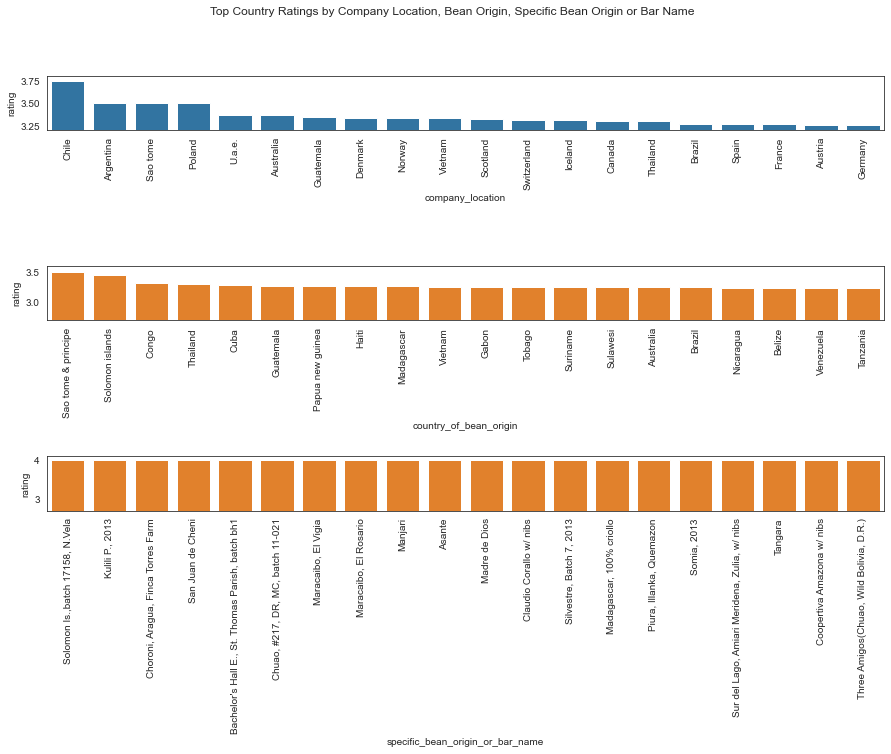

In [550]:
#'Top Country Ratings by Company Location, Bean Origin, Specific Bean Origin or Bar Name'

fig, ax = plt.subplots(nrows=3, figsize = [15,8]);
plt.suptitle('Top Country Ratings by Company Location, Bean Origin, Specific Bean Origin or Bar Name', y=1)

#company location of top rated bars (top 20)
g = sb.barplot(data = company_location.iloc[:20],
           x='company_location',
           y='rating',
           color = sb.color_palette()[0],
           ax = ax[0]);
ax[0].tick_params(axis='x', rotation=90)
g.set(ylim=(3.20, 3.81))
#g.set(ylim=(0, 3))

#country bean_of_bean_origin (top 20)
g = sb.barplot(data = country_bean.iloc[:20],
           x='country_of_bean_origin',
           y='rating',
           color = sb.color_palette()[1],
           ax = ax[1]);
ax[1].tick_params(axis='x', rotation=90)
g.set(ylim=(2.7, 3.6)) 

#top rated bars (top 20)
g = sb.barplot(data = bar_name.iloc[:20],
           x='specific_bean_origin_or_bar_name',
           y='rating',
           color = sb.color_palette()[1],
           ax = ax[2]);
ax[2].tick_params(axis='x', rotation=90)
g.set(ylim=(2.7, 4.1)) 

plt.subplots_adjust(hspace = 2.5)

#plt.xticks(rotation = 45);
plt.show()

#### Bivarite Plots : unique country_of_bean_origin with company_location

In [551]:
# unique values for country names, bar names, company locations

print(country_bean.shape, " total unique country names")
print(bar_name.shape, "total unique bar names" )
print(company_location.shape, "total company locations")


(61, 2)  total unique country names
(1398, 2) total unique bar names
(66, 2) total company locations


In [552]:
#Plotting relationship between country_of_bean_origin and company_location.
bean_and_location = choc.groupby(['country_of_bean_origin'])['rating'].mean().reset_index().sort_values(by='rating', ascending=False)[:20]
mask = np.isin(choc['country_of_bean_origin'],bean_and_location.values)
top_rated_20 = choc[mask]

In [553]:
''' Alternate way to try without rating
#bean_and_location = choc.groupby(['country_of_bean_origin','company_location'])['specific_bean_origin_or_bar_name'].count().reset_index()
'''

" Alternate way to try without rating\n#bean_and_location = choc.groupby(['country_of_bean_origin','company_location'])['specific_bean_origin_or_bar_name'].count().reset_index()\n"

In [554]:
bean_and_location.head()

,country_of_bean_origin,rating
41,Sao tome & principe,3.500000
43,Solomon islands,3.450000
8,Congo,3.318182
52,Thailand,3.300000
10,Cuba,3.291667


In [555]:
#top_rated_20.country_of_bean_origin.value_counts()

In [556]:
#len(top_rated_20.company_location.value_counts())

In [557]:
#Company_location is upper case label to differentiate since company_locatoin and country_of_bean_origin are both places.
top_rated_20 = top_rated_20.copy()
top_rated_20['company_location'] = top_rated_20['company_location'].str.upper() 

In [558]:
print(country_bean.head(5))
print(top_rated_20.country_of_bean_origin.value_counts());

   country_of_bean_origin    rating
41    Sao tome & principe  3.500000
43        Solomon islands  3.450000
8                   Congo  3.318182
52               Thailand  3.300000
10                   Cuba  3.291667
Venezuela              238
Madagascar             157
Nicaragua               92
Brazil                  74
Belize                  65
Vietnam                 64
Tanzania                63
Guatemala               53
Papua new guinea        48
Haiti                   24
Cuba                    12
Congo                   11
Solomon islands         10
Thailand                 5
Australia                3
Suriname                 1
Gabon                    1
Tobago                   1
Sao tome & principe      1
Sulawesi                 1
Name: country_of_bean_origin, dtype: int64


In [559]:
top_rated_20['company_location'].value_counts();

Text(0.5, 1.0, 'Relationship of Country of Bean Origin to Company Location (by Top 20 rated bean origin). (Bean Origin - Lowercase, Company Location - ALLCAPS')

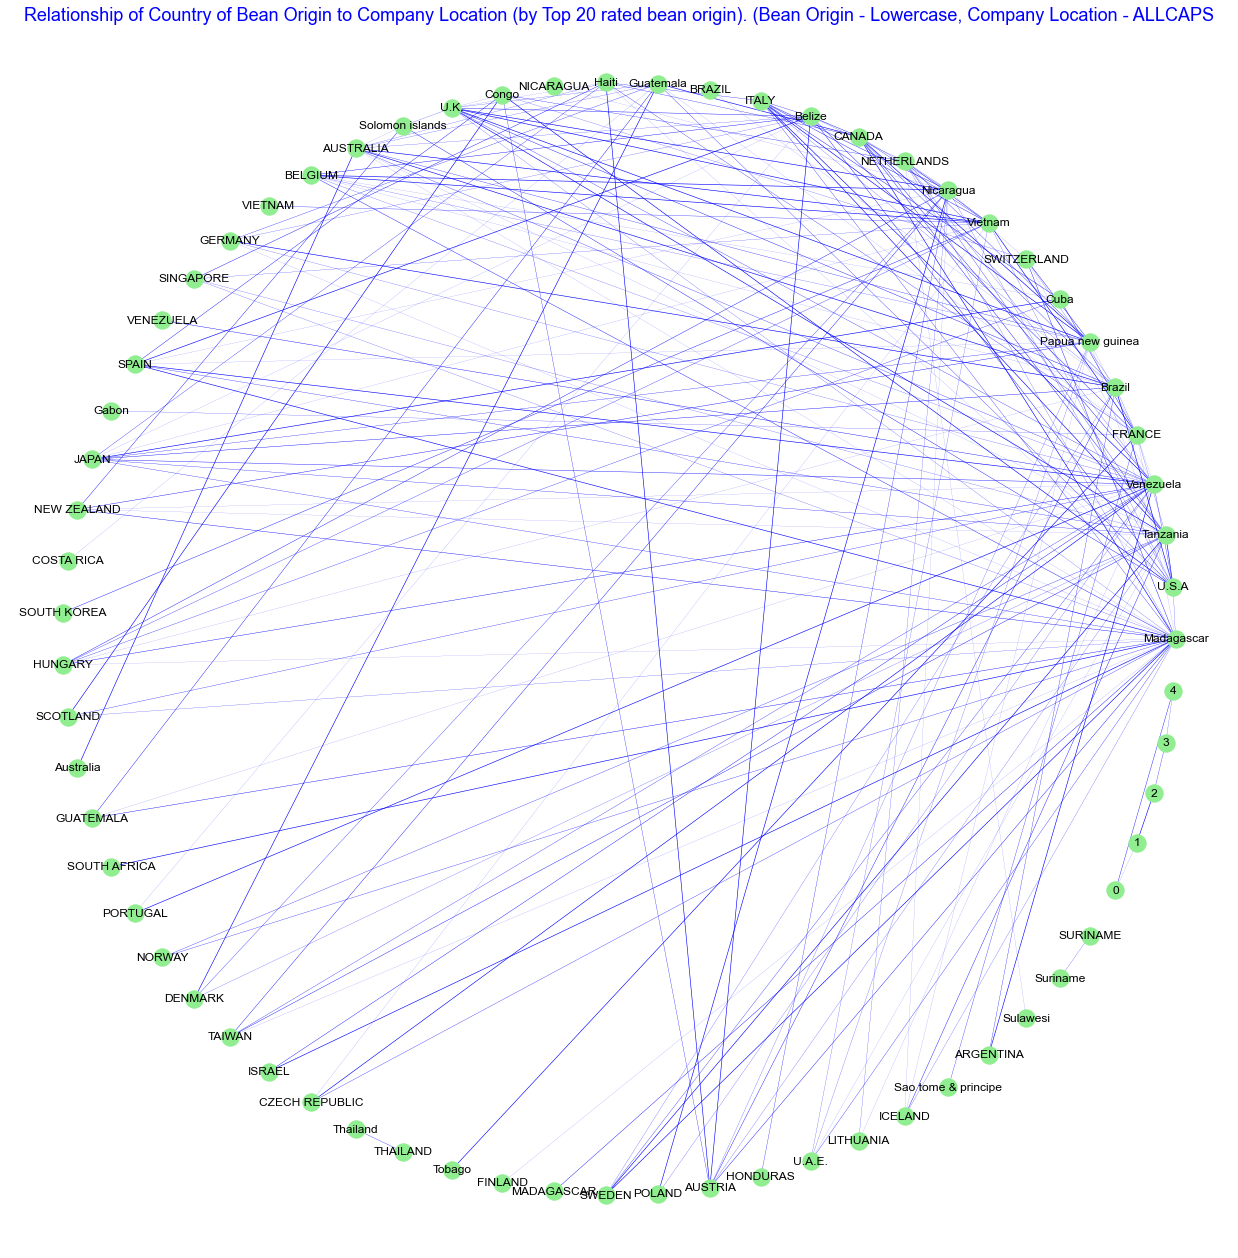

In [560]:
import networkx as nx
# Build your graph
plt.figure(figsize=(17,17))

G=nx.from_pandas_edgelist(top_rated_20, 'country_of_bean_origin', 'company_location')
# a
G.add_edge(0,1,color='b',weight=0.2)
G.add_edge(1,2,color='b',weight=0.4)
G.add_edge(2,3,color='b',weight=0.6) #6
G.add_edge(3,4,color='b',weight=0.3)
G.add_edge(4,0,color='b',weight=0.1)
#colors - r,g,b,y,m
colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.circular_layout(G)

# Plot it
nx.draw(G, pos,edge_color=colors, width=list(weights), with_labels=True, node_color='lightgreen', cmap=plt.get_cmap('viridis'))


plt.title(label="Relationship of Country of Bean Origin to Company Location (by Top 20 rated bean origin). (Bean Origin - Lowercase, Company Location - ALLCAPS", fontsize=18, color="Blue")

#nx.draw(G, with_labels=True)
#plt.show()

In [566]:
G['U.S.A']

AtlasView({'Madagascar': {}, 'Tanzania': {}, 'Venezuela': {}, 'Nicaragua': {}, 'Papua new guinea': {}, 'Belize': {}, 'Brazil': {}, 'Guatemala': {}, 'Vietnam': {}, 'Haiti': {}, 'Solomon islands': {}, 'Congo': {}})

In [567]:
connections = {}
for x in G.nodes:
 connections[x] = len(G[x])
s = pd.Series(connections, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [568]:
df2.head()

,connections
Madagascar,28
Venezuela,25
Tanzania,18
Nicaragua,16
Brazil,15


I was trouble visualizing 2 categories with so many unique points and relationships so I decided to try a network graph to get a high level view of this trend. I had never used one before and still have a lot to learn on how to approach it. Still, I found having a network graph was an interesting way to view the data, especially when the length of the columns plotted are not a 1 to 1 relationship.  However,  it is not easy enough to interpret to be in the explanatory report.  (country_of_bean_origin is in lower case in the graph, company_location in ALLCAPS)

#### Bivarite Plots : country_of_bean_origin with company_location (based on rating) - another view instead of the network graph

In [570]:
top_rated_20.country_of_bean_origin.value_counts()

Venezuela              238
Madagascar             157
Nicaragua               92
Brazil                  74
Belize                  65
Vietnam                 64
Tanzania                63
Guatemala               53
Papua new guinea        48
Haiti                   24
Cuba                    12
Congo                   11
Solomon islands         10
Thailand                 5
Australia                3
Suriname                 1
Gabon                    1
Tobago                   1
Sao tome & principe      1
Sulawesi                 1
Name: country_of_bean_origin, dtype: int64

In [571]:
top_rated_20.company_location.value_counts();

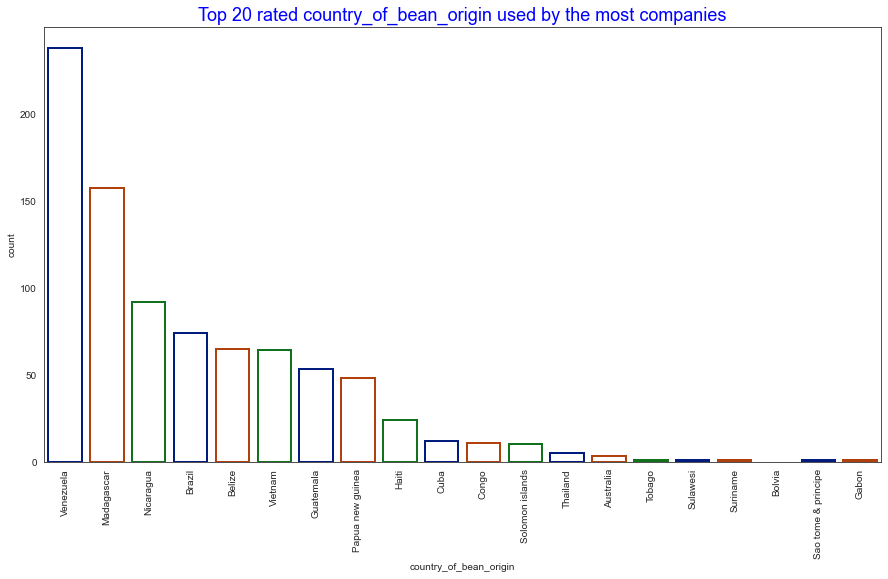

In [572]:
#company location of top rated bars (top 20)
fig, ax = plt.subplots(nrows=1, figsize = [15,8]);

order = ['Venezuela', 'Madagascar', 'Nicaragua', 'Brazil', 'Belize', 'Vietnam',
       'Guatemala', 'Papua new guinea', 'Haiti', 'Cuba', 'Congo',
       'Solomon islands', 'Thailand', 'Australia', 'Tobago', 'Sulawesi',
       'Suriname', 'Bolvia', 'Sao tome & principe', 'Gabon']

#convert new rating_category variable to categorical data type 
ordered_var = pd.api.types.CategoricalDtype(categories = order, ordered = True)
top_rated_20['country_of_bean_origin'] = top_rated_20['country_of_bean_origin'].astype(ordered_var)

g = sb.countplot(data = top_rated_20, 
                 x = "country_of_bean_origin", 
                 edgecolor=sb.color_palette("dark", 3), 
                 facecolor=(0, 0, 0, 0), 
                 linewidth=2, 
                 order=order, 
                 ax=ax)


plt.title(label="Top 20 rated country_of_bean_origin used by the most companies", fontsize=18, color="Blue")

plt.xticks(rotation = 90)
plt.show()


In [573]:
#calculate order of company_location
top_rated_20.company_location.value_counts().index;

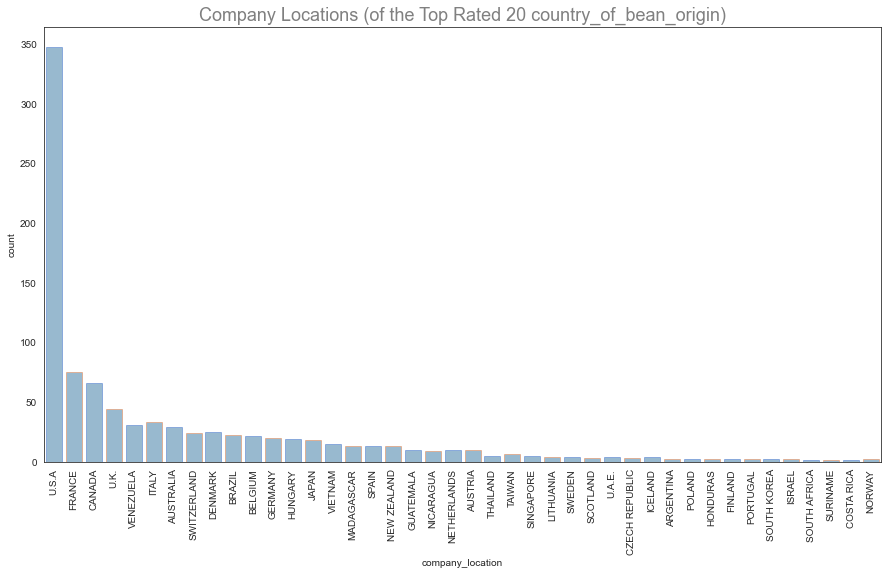

In [574]:
fig, ax = plt.subplots(nrows=1, figsize = [15,8]);
order = ['U.S.A', 'FRANCE', 'CANADA', 'U.K.', 'VENEZUELA', 'ITALY', 'AUSTRALIA',
       'SWITZERLAND', 'DENMARK', 'BRAZIL', 'BELGIUM', 'GERMANY', 'HUNGARY',
       'JAPAN', 'VIETNAM', 'MADAGASCAR', 'SPAIN', 'NEW ZEALAND', 'GUATEMALA',
       'NICARAGUA', 'NETHERLANDS', 'AUSTRIA', 'THAILAND', 'TAIWAN',
       'SINGAPORE', 'LITHUANIA', 'SWEDEN', 'SCOTLAND', 'U.A.E.',
       'CZECH REPUBLIC', 'ICELAND', 'ARGENTINA', 'POLAND', 'HONDURAS',
       'FINLAND', 'PORTUGAL', 'SOUTH KOREA', 'ISRAEL', 'SOUTH AFRICA',
       'SURINAME', 'COSTA RICA', 'NORWAY']
g = sb.countplot(data = top_rated_20, 
                 x = "company_location", 
                 alpha = 0.5, 
                 color = base_color, 
                 edgecolor=sb.color_palette("muted", 2), 
                 ax=ax,
                order=order)
plt.title(label="Company Locations (of the Top Rated 20 country_of_bean_origin)", fontsize=18, color="Grey")

plt.xticks(rotation = 90)
plt.show()

This graph takes 1 more look  2 categorical variables that have many data points. I plotted the 20 most highly rated country_of_bean_origin (mean rating), and overlayed them with the companies that purchase their beans. The 20 country_of_bean_origin (in color) sell to a wide variety of companies in grey.

In [575]:
choc.head(1)

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN,Highly Recommended


In [576]:
choc[choc['country_of_bean_origin'] == "France"]

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste,rating_category


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this part of the investigation I focused on how the other variables compared with rating or rating_category.  The heatmap was really interesting because it showed subtle differences in correlation that I found helpful -- especially for noticing how certain ingredients correlate with ratings.  I plotted individual variables to verify these correlations (lethicin - slightly negative correlation, and cocoa_percent - slightly negative correlation). Salt seemed negatively correlated. On further inspection I noticed very low-rated outlier containing salt that probably dragged the correlation down a bit.  I followed it up to the individual data point of a small artisan business that is no longer in business but clearly was a labor of love.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I also experimented with different ways of viewing the Relationship of country_bean_of_origin to company_location (by Top 20 rated bean origin) using a network plot because I wanted to see which company locations purchased the most highly rated chocolate.  The density of lines  showed a high-level of relationships between Madagascar, Venezuela, Nicaragua, Brazil, Papua new guinea. It also was fun to visually explore the relationsips.

I plotted this same relationship but this time using 2 separate bar charts to show the 20 main highly-rated country_bean_of_origin countries and the spread of all of the company_locations that are directly connected in the dataset. The most popular country_of_bean_origin (Venezuela, Madagascar, Nicaragua ...), and company_location (USA,France, Canada, U.K. ...)

## Multivariate Exploration

#### Multivariate plot : Tastes vs. taste categories vs. rating categories

In [577]:
tastes = choc.melt(id_vars = ['specific_bean_origin_or_bar_name','rating_category'],
                                     value_vars = ['first_taste','second_taste','third_taste'], var_name = 'tastes', value_name = 'contains').dropna()
tastes.head(2)

,specific_bean_origin_or_bar_name,rating_category,tastes,contains
0,"Bejofo Estate, batch 1",Highly Recommended,first_taste,cocoa
1,"Zorzal, batch 1",Highly Recommended,first_taste,cocoa


In [578]:
unpleasant = tastes.loc[tastes['rating_category'] == "Unpleasant"]
top_unpleasant = (unpleasant[np.isin(unpleasant['contains'],(unpleasant['contains'].value_counts(sort=True).nlargest(20)).index)])

disappointing = tastes.loc[tastes['rating_category'] == "Disappointing"]
top_disappointing = (disappointing[np.isin(disappointing['contains'],(disappointing['contains'].value_counts(sort=True).nlargest(20)).index)])

recommended = tastes.loc[tastes['rating_category'] == "Recommended"]
top_recommended = (recommended[np.isin(recommended['contains'],(recommended['contains'].value_counts(sort=True).nlargest(20)).index)])

highly_rec = tastes.loc[tastes['rating_category'] == "Highly Recommended"]
top_highly_rec = (highly_rec[np.isin(highly_rec['contains'],(highly_rec['contains'].value_counts(sort=True).nlargest(20)).index)])

outstanding = tastes.loc[tastes['rating_category'] == "Outstanding"]
top_outstanding = (outstanding[np.isin(outstanding['contains'],(outstanding['contains'].value_counts(sort=True).nlargest(20)).index)])

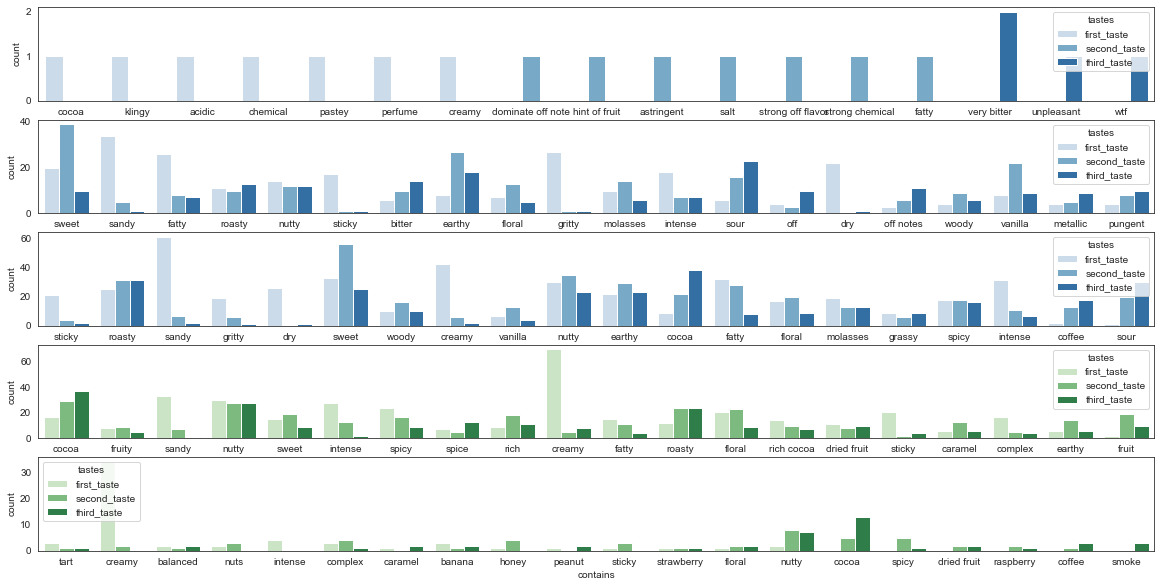

In [579]:
plt.figure(figsize = [20, 10])

# subplot 1: 
plt.subplot(5, 1, 1)
sb.countplot(data = top_unpleasant, x = 'contains', hue = 'tastes', palette = 'Blues' )
#plt.xticks(rotation = 45)

# subplot 1: color vs cut
plt.subplot(5, 1, 2)
sb.countplot(data = top_disappointing, x = 'contains', hue = 'tastes', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(5, 1, 3)
sb.countplot(data = top_recommended, x = 'contains', hue = 'tastes', palette = 'Blues')

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(5, 1, 4)
sb.countplot(data = top_highly_rec, x = 'contains', hue = 'tastes', palette = 'Greens')

# subplot 4: clarity vs. color, use different color palette
ax = plt.subplot(5, 1, 5)
sb.countplot(data = top_outstanding, x = 'contains', hue = 'tastes', palette = 'Greens')


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For the Outstanding category, the creamy first taste dominates, followed by the intense taste. The second taste in this category has a lot of nutty, cocoa, spicy characteristics.  The third taste has high levels of nutty, cocoa, coffee, and smoke. 

The next category - Highly-Recommended - has more variety in taste ratings, but is still dominated by creamy, nutty, cocoa, and roasty overtones. From this, I can see that ratings are corellate highly with these tastes.

As we visually scan through the Highly-Recommended, Recommended, and Disappointing categories, we see a larger variety of competing tastes and the relationships are less obvious. Still because we can see them side by side they are more easily spotted. Of  The Recommended category is dominated by a sandy taste, which I don't associate with a pleasant creamy mouthfeel.  Sandy is also highly correlated with the Disappointing Category, so its correlation with Recommended (as well as my personal bias) makes it a non-intuitive characteristic that we could follow up on.  

The Unpleasant Category has few tastes but they *seem* unpleasant --  klingy, acidic, chemical, very bitter, unpleasant, and the classic taste, 'wtf'.  

### Were there any interesting or surprising interactions between features?

I found it surprising that the higher the category rating, the fewer the influential tastes. Creamy seemed to dominate everything in the higher categories!  